In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [3]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [4]:
!kaggle datasets download -d nowke9/ipldata

  0% 0.00/1.20M [00:00<?, ?B/s]
100% 1.20M/1.20M [00:00<00:00, 39.9MB/s]


In [5]:
!ls

deliveries.csv	ipldata.zip  kaggle.json  matches.csv


In [6]:
!unzip \*.zip  && rm *.zip

Archive:  ipldata.zip
replace deliveries.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace matches.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')

In [8]:
data=pd.read_csv('deliveries.csv')
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [9]:
data2= pd.read_csv('matches.csv')
data2.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [10]:
data.batting_team.replace({'Delhi Daredevils' : 'Delhi Capitals'},inplace=True)
data.bowling_team.replace({'Delhi Daredevils' : 'Delhi Capitals'},inplace=True)

In [11]:
data2.team1.replace({'Delhi Daredevils' : 'Delhi Capitals'},inplace=True)
data2.team2.replace({'Delhi Daredevils' : 'Delhi Capitals'},inplace=True)

In [12]:
data2.toss_winner.replace({'Delhi Daredevils' : 'Delhi Capitals'},inplace=True)
data2.winner.replace({'Delhi Daredevils' : 'Delhi Capitals'},inplace=True)

In [13]:
data_f = data2.loc[data2.team1.isin(['Delhi Capitals','Mumbai Indians'])] 
data_f = data_f.loc[data_f.team2.isin(['Delhi Capitals','Mumbai Indians'])] 
data_f

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
23,24,2017,Mumbai,2017-04-22,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Mumbai Indians,14,0,MJ McClenaghan,Wankhede Stadium,A Nand Kishore,S Ravi,NaN
43,44,2017,Delhi,2017-05-06,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN
81,82,2008,Mumbai,2008-05-04,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Mumbai Indians,29,0,SM Pollock,Dr DY Patil Sports Academy,IL Howell,RE Koertzen,NaN
108,109,2008,Delhi,2008-05-24,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,5,KD Karthik,Feroz Shah Kotla,BF Bowden,K Hariharan,NaN
149,150,2009,East London,2009-05-08,Mumbai Indians,Delhi Capitals,Mumbai Indians,bat,normal,0,Delhi Capitals,0,7,A Nehra,Buffalo Park,M Erasmus,SK Tarapore,NaN
169,170,2009,Centurion,2009-05-21,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,4,V Sehwag,SuperSport Park,IL Howell,S Ravi,NaN
182,183,2010,Delhi,2010-03-17,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Mumbai Indians,98,0,SR Tendulkar,Feroz Shah Kotla,BR Doctrove,SK Tarapore,NaN
220,221,2010,Mumbai,2010-04-13,Mumbai Indians,Delhi Capitals,Mumbai Indians,bat,normal,0,Mumbai Indians,39,0,KA Pollard,Brabourne Stadium,S Asnani,DJ Harper,NaN
237,238,2011,Delhi,2011-04-10,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,normal,0,Mumbai Indians,0,8,SL Malinga,Feroz Shah Kotla,AM Saheba,RB Tiffin,NaN
281,282,2011,Mumbai,2011-05-07,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Mumbai Indians,32,0,AT Rayudu,Wankhede Stadium,K Hariharan,SJA Taufel,NaN


**Let's do Q1 now**

MI Wins - 12
DC Wins - 12


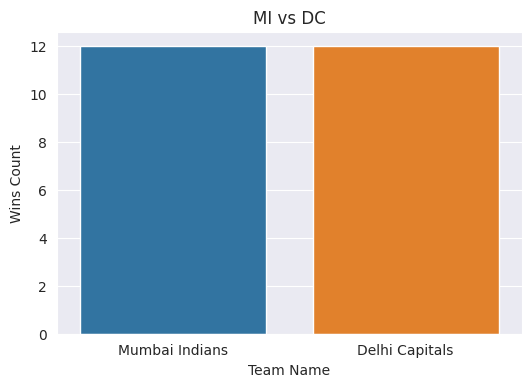

In [15]:
plt.figure(dpi=100)
sns.countplot(x='winner',data = data_f)
plt.ylabel('Wins Count')
plt.xlabel('Team Name')
plt.title('MI vs DC')
A,B =data_f.winner.value_counts()

print('MI Wins -',A)
print('DC Wins -',B)

plt.show()


Wooh, Here is a neck to neck fight

But as in this IPL MI defeated both times.

Let's mark MI considering it.

**Let's do Q2 now**

**Let's find wickets lost by both in powerplays**

In [16]:
data_n = data.loc[data.bowling_team.isin(['Delhi Capitals','Mumbai Indians'])]
data_n = data_n.loc[data.batting_team.isin(['Delhi Capitals','Mumbai Indians'])]

In [17]:
data_p = data_n.loc[data.over <=6]

In [19]:
data_p.player_dismissed.value_counts().sum()

75

In [20]:
data_p.match_id.nunique()

24

In [22]:
np.round(75/24,2) # Average wicket lost in powerplay in MI v DC

3.12

Let's mark 2-3 considering our analysis

**For Q3, Let's find Economy rate for all with given condition**

In [23]:
data_er = data_n.groupby(['match_id','bowler']).apply(lambda data_n:(data_n.total_runs.sum())).reset_index(name='Runs_Given')
data_er

,match_id,bowler,Runs_Given
0,24,A Mishra,19
1,24,CH Morris,33
2,24,HH Pandya,25
3,24,Harbhajan Singh,26
4,24,JJ Bumrah,21
...,...,...,...
278,11325,K Paul,38
279,11325,K Rabada,42
280,11325,KH Pandya,7
281,11325,RD Chahar,21


In [24]:
data_er2 = data_n.groupby(['match_id','bowler']).apply(lambda data_n:(data_n.over.value_counts().sum())).reset_index(name='Balls_bowled')
data_er2

,match_id,bowler,Balls_bowled
0,24,A Mishra,25
1,24,CH Morris,25
2,24,HH Pandya,20
3,24,Harbhajan Singh,24
4,24,JJ Bumrah,25
...,...,...,...
278,11325,K Paul,19
279,11325,K Rabada,26
280,11325,KH Pandya,12
281,11325,RD Chahar,26


In [37]:
data_e = data_er.join(data_er2['Balls_bowled'])
data_e

,match_id,bowler,Runs_Given,Balls_bowled
0,24,A Mishra,19,25
1,24,CH Morris,33,25
2,24,HH Pandya,25,20
3,24,Harbhajan Singh,26,24
4,24,JJ Bumrah,21,25
...,...,...,...,...
278,11325,K Paul,38,19
279,11325,K Rabada,42,26
280,11325,KH Pandya,7,12
281,11325,RD Chahar,21,26


In [38]:
data_e['Overs_Bowled'] = data_e['Balls_bowled'] // 6
data_e

,match_id,bowler,Runs_Given,Balls_bowled,Overs_Bowled
0,24,A Mishra,19,25,4
1,24,CH Morris,33,25,4
2,24,HH Pandya,25,20,3
3,24,Harbhajan Singh,26,24,4
4,24,JJ Bumrah,21,25,4
...,...,...,...,...,...
278,11325,K Paul,38,19,3
279,11325,K Rabada,42,26,4
280,11325,KH Pandya,7,12,2
281,11325,RD Chahar,21,26,4


We have used // because there were some balls more than 24.

Also, there can be some balls less than the complete over.

Let's find Economy rate for both

In [39]:
data_e['Economy_rate_overs'] =( data_e['Runs_Given'] / data_e['Overs_Bowled'])
data_e

,match_id,bowler,Runs_Given,Balls_bowled,Overs_Bowled,Economy_rate_overs
0,24,A Mishra,19,25,4,4.750000
1,24,CH Morris,33,25,4,8.250000
2,24,HH Pandya,25,20,3,8.333333
3,24,Harbhajan Singh,26,24,4,6.500000
4,24,JJ Bumrah,21,25,4,5.250000
...,...,...,...,...,...,...
278,11325,K Paul,38,19,3,12.666667
279,11325,K Rabada,42,26,4,10.500000
280,11325,KH Pandya,7,12,2,3.500000
281,11325,RD Chahar,21,26,4,5.250000


In [40]:
data_e['Economy_rate_balls'] =( data_e['Runs_Given'] / data_e['Balls_bowled']) * 6
data_e

,match_id,bowler,Runs_Given,Balls_bowled,Overs_Bowled,Economy_rate_overs,Economy_rate_balls
0,24,A Mishra,19,25,4,4.750000,4.560000
1,24,CH Morris,33,25,4,8.250000,7.920000
2,24,HH Pandya,25,20,3,8.333333,7.500000
3,24,Harbhajan Singh,26,24,4,6.500000,6.500000
4,24,JJ Bumrah,21,25,4,5.250000,5.040000
...,...,...,...,...,...,...,...
278,11325,K Paul,38,19,3,12.666667,12.000000
279,11325,K Rabada,42,26,4,10.500000,9.692308
280,11325,KH Pandya,7,12,2,3.500000,3.500000
281,11325,RD Chahar,21,26,4,5.250000,4.846154


In [41]:
data_e = data_e[data_e.Balls_bowled > 6 ] # Max 1 over condition

In [42]:
data_e = data_e[data_e.Overs_Bowled >1] # Max 1 over condition

In [43]:
data_e = data_e[data_e.Economy_rate_overs < 9] # Economy rate should be less than 9

In [44]:
data_e = data_e[data_e.Economy_rate_balls < 9] # Economy rate should be less than 8

In [47]:
data_e.Economy_rate_overs.value_counts().sum() # No of bowlers with less than economy rate of 9 in MI v DC contest

156

In [48]:
data_e.Economy_rate_balls.value_counts().sum() # No of bowlers with less than economy rate of 9 in MI v DC contest

156

In [49]:
np.round(156/24,2) # Average bowler per match with Economy of less than 9

6.5


Let's mark 5-6 considering our analysis

**Let's do Q4 now**

**Let's find Batsman scoring more than 30 runs in match**

In [50]:
data_b = data_n.groupby(['match_id','batsman']).apply(lambda data_n:(data_n.total_runs.sum())).reset_index(name='Runs')
data_b

,match_id,batsman,Runs
0,24,AP Tare,0
1,24,CH Morris,54
2,24,CJ Anderson,1
3,24,HH Pandya,25
4,24,Harbhajan Singh,2
...,...,...,...
377,11325,Q de Kock,37
378,11325,RG Sharma,32
379,11325,RR Pant,7
380,11325,S Dhawan,35


In [52]:
data_b = data_b[data_b.Runs> 30 ] # Max 30 runs
data_b

,match_id,batsman,Runs
1,24,CH Morris,54
5,24,JC Buttler,35
6,24,K Rabada,48
21,44,HH Pandya,33
23,44,KA Pollard,67
...,...,...,...
373,11325,HH Pandya,32
375,11325,KH Pandya,45
377,11325,Q de Kock,37
378,11325,RG Sharma,32


In [54]:
data_b.Runs.value_counts().sum()

92

In [55]:
np.round(92/24,2) # Average batsman scoring more than 30 runs

3.83

Let's mark 3-4 considering our analysis

**Let's do Q5 now**

**Let's find Bumrah's stats in death**

In [58]:
data_m = data.loc[data.bowling_team.isin(['Mumbai Indians'])]
data_m = data_m.loc[data.batting_team.isin(['Delhi Capitals'])]
data_m = data_m.loc[data.bowler.isin(['JJ Bumrah'])]

In [60]:
data_m = data_m.loc[(data_m.over>=15) & (data_m.over<=20)]

In [61]:
data_m.match_id.nunique()

10

In [62]:
data_m.total_runs.sum()

180

In [63]:
data_m.over.value_counts().sum()

120

120 are balls so overs will be 120/6 = 20 overs.

In [65]:
np.round(180/20,2) # Bumrah's economy rate in deaths v DC

9.0

Let's mark 8 and above



Thank You again for this amazing internship.

Looking forward to it tomorrow.

Regards,

Ashaab Rizvi